##   Problem Definition
Goal: Predict whether a customer will churn (leave the service) based on their profile and service usage.


# 1. Importing  Basic libraries like:
pandas,numpy,seaborn,matplotlib

In [13]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns




### For handling class imbalance
from imblearn.over_sampling import SMOTE,

Libraries for Preprocessing and model building 

### pip install imbalanced-learn,

from imblearn.over_sampling import SMOTE


#### from imblearn.over_sampling import SMOTE
## What is SMOTE?
SMOTE stands for Synthetic Minority Over-sampling Technique.

It helps balance the dataset by creating synthetic samples of the minority class (in our case, Churn = Yes) instead of just duplicating rows.
When to Use SMOTE:
After encoding and scaling

Only on training data (not test data!)

Best used with models like Logistic Regression, Random Forest, etc.

### train_test_split:
Splits your data into training and testing sets
### cross_val_score:	
Performs cross-validation to test model robustness
### Use of DecisionTreeClassifier:
To build a model that splits decisions based on feature values
#### Metric,	Tells You...,	When to Use:
accuracy_score	,Overall correctness	,Balanced datasets

confusion_matrix,	Detailed error types (FP, FN, etc.),	Any classification

classification_report,	(Precision, Recall, F1 per class),	Imbalanced datasets like churn

In [14]:
# For encoding categorical columns
from sklearn.preprocessing import LabelEncoder

# For handling class imbalance
from imblearn.over_sampling import SMOTE

# For splitting data & validating model
from sklearn.model_selection import train_test_split, cross_val_score

# For training models
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# For evaluating model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# For saving/loading trained model
import pickle


# 2. Data Loading and Understanding

In [15]:
#load Telco csv data to pandas Dataframe
df=pd.read_csv("Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [16]:
df.shape

(7043, 21)

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
pd.set_option("display.max_columns",None) 
# Show all columns in output

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
#dropping column customer iD this is not required for churn model,


# Why is customerID not required?
# Because it is just an identifier, not a feature that influences churn.
df =df.drop(columns=["customerID"])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [21]:
# printing the unique values in all columns

numerical_feature_list = ["tenure", "MonthlyCharges", "TotalCharges"] #used this because we don't want any numerical value there but only categorical value
for col in df.columns:
    if col not in numerical_feature_list:
        print(col,df[col].unique())
        print("-"*50)#It prints a horizontal line of 50 dashes:
# printing the unique values in all columns but manuaally
# print(df["gender"].unique())     can type for all but might be time consuming so we used for loop
    

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [23]:
#converting object type data of total charges to int or float64
df["TotalCharges"] = df["TotalCharges"].astype(float) #will give error 

ValueError: could not convert string to float: ' '

In [ ]:
# so to avoid error we will do
df[df["TotalCharges"]==" "]


In [ ]:
# len(df[df["TotalCharges"]==" "]) #or  # Or df["TotalCharges"].eq(" ").sum() # Check how many blank values exist

In [24]:
# df["TotalCharges"].replace({" ","0.0"}) # will depricated so use: # Replace blanks with NaN first (cleaner than replacing with 0)
# df["TotalCharges"]=df["TotalCharges"].replace(" ", pd.NA)
# Check which values are causing the issue


In [25]:
#step1 
# List all unique problematic values in the column
invalid_values = df[~df["TotalCharges"].astype(str).str.replace('.', '', 1).str.isdigit()]
print("Invalid TotalCharges rows:")
print(invalid_values["TotalCharges"].unique())


Invalid TotalCharges rows:
[' ']


##  3.  Cleaning of data

In [26]:
#Step 2: Remove Only Invalid Entries
# Clean and convert safely .Ensured all values are strings (even if they were NaN or numbers).
# .str.strip() removes any spaces like " 45.6 " → "45.6".


df["TotalCharges"] = df["TotalCharges"].astype(str).str.strip()

# Remove known invalid patterns
df = df[~df["TotalCharges"].isin(["", " ", "<NA>", "nan", "NaN"])]

# Now convert to float safely
df["TotalCharges"] = df["TotalCharges"].astype(float)

# Reset index to keep things clean
df.reset_index(drop=True, inplace=True)

# Final check
print("✅ Cleaned! Data type:", df["TotalCharges"].dtype)


✅ Cleaned! Data type: float64


C:\Users\welcome\AppData\Local\Temp\ipykernel_14696\1465085295.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalCharges"] = df["TotalCharges"].astype(float)


In [27]:
# Keep only rows where TotalCharges is numeric
df = df[df["TotalCharges"].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
df["TotalCharges"] = df["TotalCharges"].astype(float)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


### Distribution of target column:

Churn column (whether a customer has left or stayed)

In [29]:
#checking the distribution of target column

print(df["Churn"].value_counts())   #Run this to see how many customers churned vs. stayed:

Churn
No     5163
Yes    1869
Name: count, dtype: int64


# Insights:-
1. Customer ID rempved as it is not required for modelling.
2. No missing values in the dataset.
3. Missing values in TotalCharges column were replaced with 0
4. class imbalance identified in the target. this imbalance will be handled using techniques like SMOTE during model training.

#### Class imbalance becomes critical when we move to the Modeling phase.

## Here's how:
Problem: If you train a model without handling imbalance, it may predict mostly 'No' (majority class), and still get high accuracy — but it'll fail to detect churners.


#### solution:Apply techniques like:

SMOTE (Synthetic Minority Oversampling Technique) from imblearn

Adjusting class weights in classifiers

Undersampling the majority class (less common)




# 3.Exploratory Data Analysis (EDA):-


In [30]:
df.shape

(7032, 20)

In [31]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [33]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [34]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [35]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

 ## Numerical Feature Analysis:
understand the distribution of Numerical features

In [36]:
def plot_histogram(df, column_name):
    sns.histplot(df[column_name], kde=True, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {column_name}")

    # Calculate mean and median values for the column
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()

    # Add vertical lines for mean and median
    plt.axvline(col_mean, color="red", linestyle="--", label=f"Mean: {col_mean:.2f}")
    plt.axvline(col_median, color="green", linestyle="--", label=f"Median: {col_median:.2f}")

    # Label axes
    plt.xlabel(column_name)
    plt.ylabel("Count")
    plt.legend()
    plt.show()


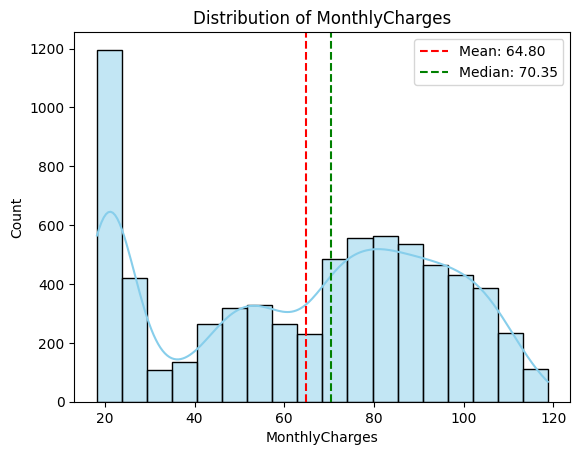

In [37]:
plot_histogram(df, "MonthlyCharges")


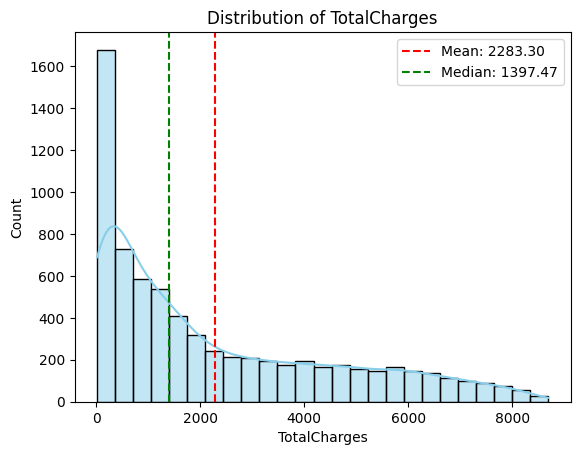

In [38]:
plot_histogram(df, "TotalCharges")


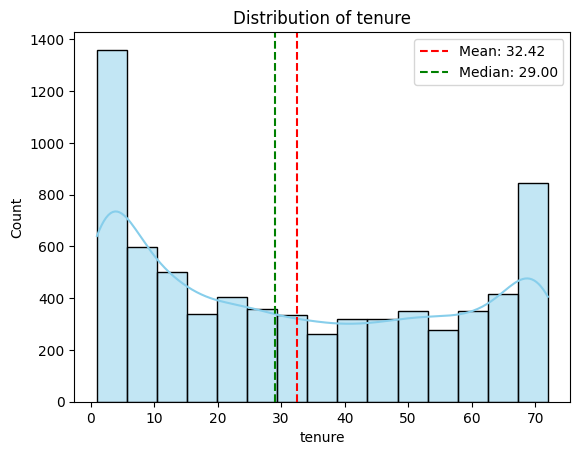

In [39]:
plot_histogram(df, "tenure")


## what is scaling 
Bring features to the same scale
### Why?
Needed for distance-based models
### Where?
Logistic, SVM, KNN, Neural Nets
### How?
StandardScaler, MinMaxScaler etc.
### Advantage?	
    Fast convergence, balanced input
### Disadvantage?	
    Harder interpretation, not always needed

#### But scaling is important — especially if you're going to use:

Logistic Regression

SVM

KNN

Neural Networks

For tree-based models, scaling is not required.





In [40]:
from sklearn.preprocessing import StandardScaler

# select only numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


### Detect Outliers in Numeric Columns by using **Boxplot**
Boxplots help us visually identify extreme values in features like:

MonthlyCharges,TotalCharges,tenure

## Why use a boxplot here?
Purpose	:Why it helps in this project


Detect Outliers	:Outliers can mislead models


Understand Spread:	Helps decide scaling or transformation


Compare Churn Groups:	See how churners differ from non-churners


Visual Summary	Quick view of median, IQR, and data skewness


In [41]:
def plot_boxplot(df,column_name):
    sns.boxplot(df[column_name])
    plt.title("Boxplot of(column_name")
    plt.ylabel(column_name)
    plt.show()

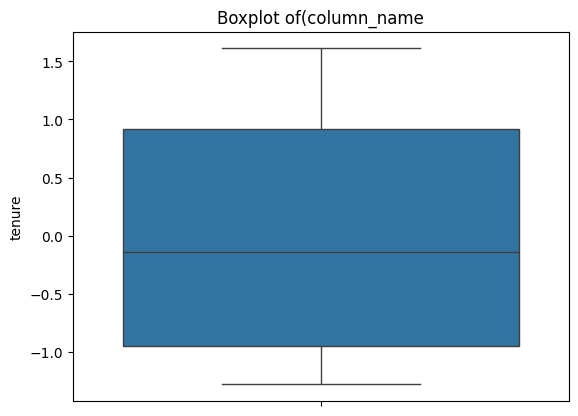

In [42]:
plot_boxplot(df,"tenure")

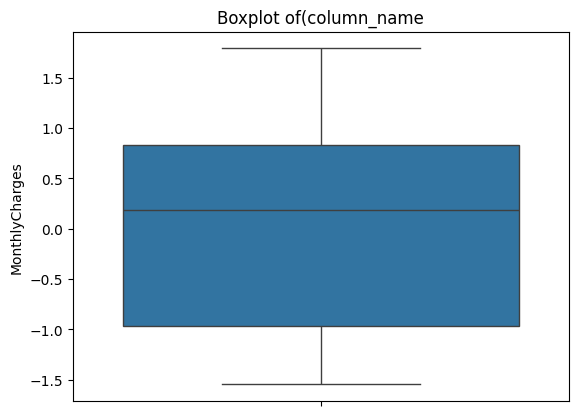

In [43]:
plot_boxplot(df,"MonthlyCharges")

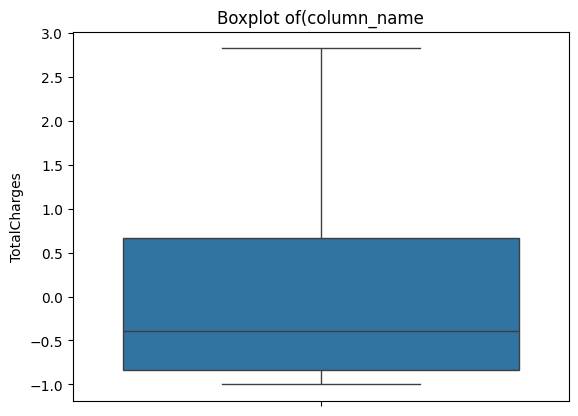

In [44]:
plot_boxplot(df,"TotalCharges")

## correlation heatmap for numerical columns:
A correlation heatmap is a colored grid that shows the correlation coefficient (from -1 to 1) between pairs of numerical features.
Correlation Value:	Meaning

+1:	 Perfect positive correlation,

0:   No correlation,

-1:	 Perfect negative correlation,

 


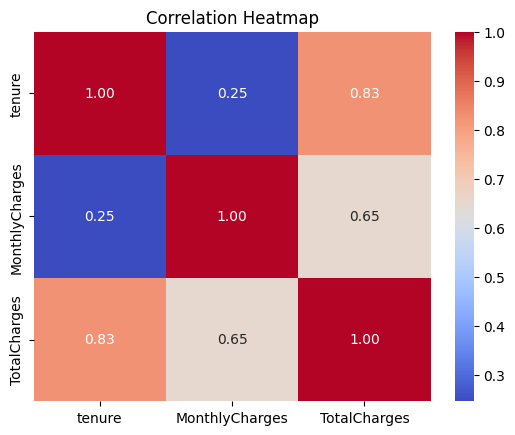

In [58]:
#correlation matrix - heatmap
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(),annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Categorical feature - Analysis:-

In [59]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   float64
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


 ## Analyzing categorical features using count plot :-
 After analyzing numerical features, it’s important to analyze categorical features — especially because many important columns like gender, Contract, InternetService, etc., are categorical in your churn dataset.
 ### summary for categorical fetures:
 
 Find all categorical columns (like gender, contract, etc.) from your dataset using .select_dtypes(include="object").

Manually add SeniorCitizen to the list because even though it's stored as numbers (0 or 1), it actually represents a category (Yes/No).

Save them in a list called obj_cols so that later you can:

Plot graphs (like bar charts)

Encode them for machine learning models

### Why This Is Important:
You need to treat categorical features differently than numerical ones in:

Exploratory Data Analysis (EDA),Data Preprocessing (like Label Encoding / OneHot Encoding),Model building


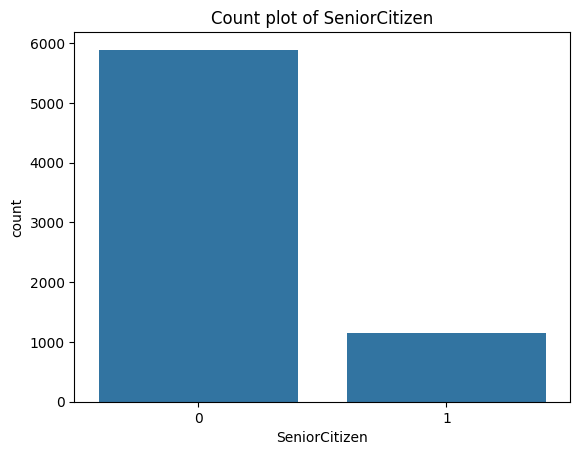

In [61]:
# Step 1: Identify categorical columns
obj_cols = df.select_dtypes(include="object").columns.to_list()
# Step 2: Add 'SeniorCitizen' to treat it like a categorical feature
obj_cols = ["SeniorCitizen"] + obj_cols


# Plot count plots for each categorical column
for col in obj_cols:
    sns.countplot(x=df[col])
    plt.title(f"Count plot of {col}")
    plt.show()

## From above graph we observed ,Class Imbalance in Target Variable (Churn)
The Churn column is imbalanced – most customers did not churn.

Example: 75% "No", 25% "Yes"

### Why It's a Problem:
If we don’t handle it, models like Logistic Regression, Random Forest, etc. may:

Predict mostly “No Churn” to get high accuracy.

But miss actual churners, which is what businesses care about.

#### How to Handle It:

SMOTE:	Generates synthetic examples for the minority class (Churn = Yes)

Class weights:	Give more importance to the minority class

Evaluation Metrics	:Use F1-Score, Recall, and AUC instead of just Accuracy

# Data Preprocessing
Data preprocessing is the cleaning and preparation of raw data so that machine learning models can understand and use it.
## Why is it needed?
Because real-world data is often:Messy,Incomplete,Not in the right format (e.g., text instead of numbers).Without preprocessing, your model may give wrong predictions or fail to work.
## How it's done (Steps):
Remove irrelevant columns (like IDs),Handle missing values,Convert data types (e.g., string to float),Encode categorical variables (LabelEncoder/OneHotEncoder)

Scale numeric values (StandardScaler/MinMaxScaler),Handle imbalance (SMOTE),Split data into training & testing sets

### Advantages:
Better accuracy,Cleaner input for ML models,Avoids errors in training

### Disadvantages:
Can be time-consuming,Needs careful handling (mistakes can affect results)

In [62]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.280248,0,1,0,0,2,0,0,0,0,0,1,2,-1.161694,-0.994194,0
1,1,0,0,0,0.064303,1,0,0,2,0,2,0,0,0,1,0,3,-0.260878,-0.173740,0
2,1,0,0,0,-1.239504,1,0,0,2,2,0,0,0,0,0,1,3,-0.363923,-0.959649,1


## Label encoding of target column

In [63]:
df["Churn"] = df["Churn"].replace({"Yes":1,"No":0})

In [64]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.280248,0,1,0,0,2,0,0,0,0,0,1,2,-1.161694,-0.994194,0
1,1,0,0,0,0.064303,1,0,0,2,0,2,0,0,0,1,0,3,-0.260878,-0.173740,0
2,1,0,0,0,-1.239504,1,0,0,2,2,0,0,0,0,0,1,3,-0.363923,-0.959649,1


In [65]:
df["Churn"].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

## Label encoding for categorical features:


In [66]:
#Identifying columns with object datatype
obj_columns=df.select_dtypes(include="object").columns
obj_columns

Index([], dtype='object')

Note: we’ve already encoded Churn, so it won’t be in this list anymore.



# Label Encoding with Encoder Persistence
 Why It’s Done (Purpose):
Machine Learning models need all features in numerical form. Categorical columns like "gender" or "InternetService" are text — which models can’t interpret.

Also, to ensure the same encoding logic is applied later (on new unseen data or in deployment), we must save the encoders.
### Benefits
Ensures compatibility between training and prediction

Speeds up model deployment

Enables consistent results across environments
### When Not to Use LabelEncoder
For non-ordinal categorical features with more than 2 classes, prefer One-Hot Encoding.

Label encoding imposes an order, which might mislead some algorithms (like linear regression).

#### we are using tree-based models (like Decision Tree, XGBoost) which handle label encoding well.

You've saved the encoders — which is best practice for production-ready pipelines.

## summary for given below code :
Label Encoding with Encoder Saving
In this step, we:

Identified all categorical columns (data type = object)

Applied Label Encoding to convert text data (e.g., "Male", "Female") into numbers (e.g., 0, 1)

Stored each encoder used for every column in a dictionary

Saved all encoders using pickle so we can reuse the same logic later (especially during deployment)

✅ This ensures our machine learning model can understand the data, and we maintain consistency during training and prediction.

In [67]:
#initialize a dictionary to save the encoders:
encoders={}

#apply label encoding and store the encoders
for column in obj_columns:
    label_encoder=LabelEncoder()
    df[column]=label_encoder.fit_transform(df[column])
    encoders[column]=label_encoder


#save the encoders to a pickle file
with open("encoders.pkl","wb") as f:
    pickle.dump(encoders,f)

In [68]:
encoders

{}

###  Encoders Summary

We applied `LabelEncoder` to all categorical (object) columns.  
The `encoders` dictionary now stores a separate encoder for each column.  
This ensures consistent label transformation during both training and prediction.

Example:
- `gender`: {'Female' → 0, 'Male' → 1}
- `Partner`: {'No' → 0, 'Yes' → 1}
- ...and so on for all 15 object columns.


In [69]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.280248,0,1,0,0,2,0,0,0,0,0,1,2,-1.161694,-0.994194,0
1,1,0,0,0,0.064303,1,0,0,2,0,2,0,0,0,1,0,3,-0.260878,-0.173740,0
2,1,0,0,0,-1.239504,1,0,0,2,2,0,0,0,0,0,1,3,-0.363923,-0.959649,1
3,1,0,0,0,0.512486,0,1,0,2,0,2,2,0,0,1,0,0,-0.747850,-0.195248,0
4,0,0,0,0,-1.239504,1,0,1,0,0,0,0,0,0,0,1,2,0.196178,-0.940457,1


# Trainig and Test Data Split
Train your model on one portion of the data

Test it on unseen data to evaluate performance

Prevent overfitting and ensure fair evaluation



In [78]:
# splitting the fetures and target
X=df.drop(columns=["Churn"])    #x → all features (input columns)

y=df["Churn"]   #y → the target variable (Churn)


###  Train-Test Split

We split the dataset into training and test sets using `train_test_split`:

- 80% training data (`X_train`, `y_train`)
- 20% testing data (`X_test`, `y_test`)

- Set `random_state=42` to ensure reproducibility


In [80]:
# split datasets into trainig and test data
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)  
# test_size=0.2	:-20% of the data is used for testing, 80% for training
# random_state=42:	Ensures you get the same split every time you run the code,it can be different 

In [83]:
y_train.shape

(5625,)

In [85]:
y_train.value_counts()   # it is imbalance so we use SMOTE

Churn
0    4130
1    1495
Name: count, dtype: int64

###  What is SMOTE?

SMOTE (Synthetic Minority Over-sampling Technique) is used to handle class imbalance in classification problems.

Instead of duplicating minority class samples, it creates **synthetic examples** by interpolating between existing ones.

This helps the model learn the patterns of both majority and minority classes effectively.

📌 We apply SMOTE **only to the training set**.

**Advantages:**
- Improves model performance on imbalanced data
- Avoids overfitting caused by simple duplication

**Disadvantages:**
- Might generate noisy samples if classes overlap

###  How SMOTE works?
Instead of just copying minority class samples (which can cause overfitting), SMOTE:

Identifies neighbors of a minority sample.

Interpolates (creates new synthetic samples) between them.

Adds these new samples to the training data.

Now the model sees a balanced view and learns better!

### ✅ SMOTE is applied only on the training data, not test data.


In [96]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new shape of y after SMOTE

# print("Before SMOTE:", y_train)
print("After SMOTE:", y_train_smote.shape)



After SMOTE: (8260,)


In [97]:
print(y_train_smote.value_counts())

Churn
1    4130
0    4130
Name: count, dtype: int64


# 5. Model Trainig:
Trainig with default hyperparameters

Model training is the process where a machine learning algorithm learns patterns and relationships from historical data (called the training set) to make predictions or classifications on new, unseen data.


Here:
model.fit() is the training function.

It learns from X_train_smote and y_train_smote (your balanced training data).

Now the model can predict churn for new customers.
#### Why Training is Important?
This is where your model learns to make decisions.

The quality of training directly affects how accurate your predictions will be.

#### Behind the scenes:
Different algorithms use different methods:

Logistic Regression: Learns weights for linear decision boundary.

Decision Tree: Learns best splits.

XGBoost: Learns from gradients and combines multiple trees.




In [106]:
#dictionary of models
from sklearn.ensemble import RandomForestClassifier

models={
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
    
    
}

In [113]:
#dictionary to store the cross validations results
cv_scores={}

#perfrom 5-Folds Cross validations for each model using loop
for model_name,model in models.items():
    
    # print(model_name)
    # print(model)
    # print(","*50
    print(f"Training {model_name} with default parameter")
    scores=cross_val_score(model,X_train_smote,y_train_smote,cv=5,scoring="accuracy")
  
    cv_scores[model_name]=scores
    print(f"{model_name} cross-validation accuracy:{np.mean(scores):.2f}")
    print(","*70)

Training Decision Tree with default parameter
Decision Tree cross-validation accuracy:0.76
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Training Random Forest with default parameter
Random Forest cross-validation accuracy:0.84
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Training XGBoost with default parameter
XGBoost cross-validation accuracy:0.83
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


   #### scores=cross_val_score(model,X_train_smote,y_train_smote,cv=5,scoring="accuracy")
    This is the core operation:

Trains the current model using 5-fold cross-validation

X_train_smote, y_train_smote: Training data after balancing with SMOTE

cv=5: Splits the data into 5 folds

scoring="accuracy": Uses accuracy as the evaluation metric

It returns 5 accuracy scores (one from each fold).
## Why Is This Important?
Cross-validation gives a more reliable estimate of model performance than a single train-test split.

Prevents overfitting and underfitting detection early.

Helps in model comparison under similar training conditions.

In [114]:
cv_scores

# structure of cv_scores
# Each key in the dictionary is the name of the model (like "Decision Tree" or "XGBoost"), and the value is the list of 5 accuracy
# scores returned by cross_val_score() — one for each fold in 5-fold cross-validation.


{'Decision Tree': array([0.70823245, 0.75      , 0.77542373, 0.79237288, 0.7972155 ]),
 'Random Forest': array([0.79600484, 0.81416465, 0.85290557, 0.8625908 , 0.86985472]),
 'XGBoost': array([0.75242131, 0.80024213, 0.85532688, 0.85774818, 0.85956416])}

### 🔎 Understanding `cv_scores`

- `cv_scores` is a dictionary that stores the 5-fold cross-validation accuracy scores for each ML model.
- Key = Model Name (e.g., "XGBoost")
- Value = List of 5 accuracy scores from cross-validation
- Helps compare models based on their average performance.

This allows us to choose the most promising model for final evaluation on test data.
### RandomForest givrs the highest accuracy compared to other models with default parameters

In [116]:
# Initialize the model
rfc = RandomForestClassifier(random_state=42
                            
# Train the model on the SMOTE-resampled data

model.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

# 6. Model Evaluation
Model Evaluation is the process of checking how well your machine learning model performs on unseen data (the test set).
In other words, you test how well your model generalizes beyond the data it was trained on.
### Why Do We Evaluate a Model?
Because just training a model isn’t enough — we need to make sure:

It isn’t overfitting (too specific to training data)

It performs well on new, real-world data

We choose the best algorithm and tuned parameters before deploying
### When Do We Evaluate the Model?
After training your model on the training data, you:

Use it to predict on the test data

Compare the predictions with the actual test labels

Use evaluation metrics to measure performance



